# PCA - Principal Component Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('wine.csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

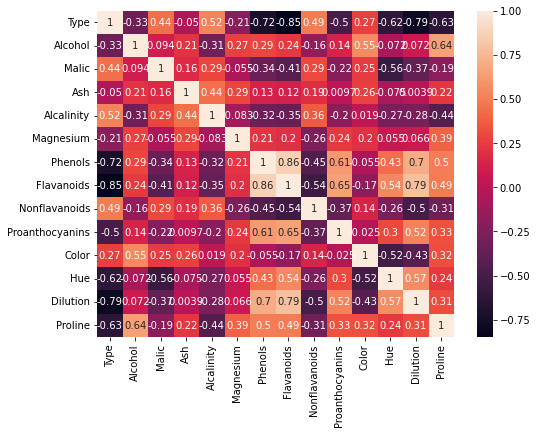

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

In [6]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [7]:
x.shape

(178, 13)

# PCA

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X = scale.fit_transform(x)

In [9]:
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [10]:
X.T

array([[0.84210526, 0.57105263, 0.56052632, ..., 0.58947368, 0.56315789,
        0.81578947],
       [0.1916996 , 0.2055336 , 0.3201581 , ..., 0.69960474, 0.36561265,
        0.66403162],
       [0.57219251, 0.4171123 , 0.70053476, ..., 0.48128342, 0.54010695,
        0.73796791],
       ...,
       [0.45528455, 0.46341463, 0.44715447, ..., 0.08943089, 0.09756098,
        0.10569106],
       [0.97069597, 0.78021978, 0.6959707 , ..., 0.10622711, 0.12820513,
        0.12087912],
       [0.56134094, 0.55064194, 0.64693295, ..., 0.39728959, 0.40085592,
        0.20114123]])

In [11]:
square_matrix=np.matmul(X.T,X)
square_matrix

array([[55.94790166, 29.9097306 , 50.85776808, 40.3039338 , 31.43080664,
        44.21969147, 34.78431046, 38.99647468, 35.32014777, 33.8433312 ,
        35.32701326, 46.07706767, 36.33945491],
       [29.9097306 , 26.34399459, 31.16619814, 27.68844994, 17.82295068,
        22.63945754, 16.62865863, 27.25449325, 19.36194062, 20.02725988,
        17.72207012, 23.85127192, 17.09583007],
       [50.85776808, 31.16619814, 55.3774486 , 45.90983516, 32.12776099,
        44.17025632, 34.77416007, 43.04752295, 35.73577489, 32.21452424,
        36.82931177, 47.11194688, 33.34675063],
       [40.3039338 , 27.68844994, 45.90983516, 42.66497502, 25.98963469,
        34.89911127, 26.82980991, 38.2920638 , 29.31732739, 26.42200746,
        30.12873187, 37.91656282, 24.27992411],
       [31.43080664, 17.82295068, 32.12776099, 25.98963469, 22.86838374,
        27.36664168, 21.64137314, 23.5192781 , 22.60934714, 19.63666715,
        22.61954754, 28.75199076, 21.67293618],
       [44.21969147, 22.639457

In [12]:
square_matrix.shape

(13, 13)

In [13]:
eigen_values,eigen_vectors = np.linalg.eigh(square_matrix)

In [14]:
pd.DataFrame(eigen_values)

,0
0,0.779305
1,1.249722
2,1.471014
3,2.153590
4,2.189326
5,2.706638
6,3.524606
7,4.535321
8,5.320480
9,7.338598


In [15]:
pd.DataFrame(eigen_values[::-1])

,0
0,414.140317
1,33.984758
2,15.582017
3,7.338598
4,5.320480
5,4.535321
6,3.524606
7,2.706638
8,2.189326
9,2.153590


In [16]:
sum = eigen_values[::-1].sum()
sum

494.97569136722007

In [17]:
eigen_values[::-1][0]/sum,eigen_values[::-1][1]/sum,eigen_values[::-1][2]/sum

(0.8366881931043411, 0.06865944921840268, 0.031480367510633274)

In [18]:
pd.DataFrame(eigen_vectors[:,::-1])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.349331,0.059347,-0.470938,-0.074291,0.278723,-0.152381,0.244008,-0.520759,-0.126135,0.066326,0.439220,-0.046327,0.011729
1,0.201022,0.379437,-0.024985,0.652666,0.413245,-0.203149,-0.286915,0.110158,-0.046094,-0.239623,-0.144681,0.032848,0.031122
2,0.356013,0.174857,0.076165,-0.018152,-0.289031,-0.190711,0.245457,0.326495,0.017261,-0.065666,0.228219,0.608411,-0.350619
3,0.293224,0.304819,0.344672,0.139243,-0.420077,-0.078116,0.312697,-0.141485,0.260294,-0.149291,0.056279,-0.492797,0.215632
4,0.215892,0.011129,-0.126984,0.006962,-0.469696,-0.333164,-0.508357,0.004663,-0.392546,0.407836,-0.026115,-0.101340,0.125130
5,0.312256,-0.281010,-0.003697,0.088638,0.015497,0.338184,0.089414,0.273211,-0.496827,-0.217967,0.039158,-0.415437,-0.387224
6,0.248540,-0.336954,0.029926,0.080120,-0.004340,0.190649,0.071384,0.163397,-0.154845,-0.186421,0.109093,0.280889,0.774393
7,0.275821,0.477674,0.295063,-0.491955,0.355642,0.293027,-0.174044,0.179244,-0.074559,0.256647,0.066663,-0.041774,0.119529
8,0.252993,-0.162338,0.039422,0.179447,-0.150173,0.485635,-0.498642,-0.274406,0.429643,-0.000547,0.249568,0.118318,-0.180756
9,0.212896,0.242837,-0.433567,-0.025849,-0.201479,0.376069,0.176857,-0.142146,-0.008060,0.024299,-0.670321,0.152175,0.020212


In [19]:
new_data=np.dot(X,eigen_vectors[:,::-1])
z=pd.DataFrame(new_data)
z

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.965754,-0.497453,-0.233561,0.026089,0.026691,-0.074433,-0.065640,-0.091287,-0.020998,0.304062,0.014195,0.051533,-0.007920
1,1.478743,-0.488921,-0.184450,-0.060043,0.240098,-0.100510,-0.003670,0.101123,-0.071526,0.104071,-0.112486,0.063780,-0.006156
2,1.911227,-0.322592,-0.105952,0.087453,-0.046445,0.119833,-0.106892,0.108599,0.219374,-0.055301,0.042628,0.100354,-0.023345
3,2.106077,-0.520098,-0.532945,0.072911,0.003523,0.120107,0.090347,0.181345,-0.025221,0.049909,0.013816,-0.135976,-0.052826
4,1.853606,-0.019308,0.115458,0.047741,-0.107207,-0.068469,-0.027883,0.080802,-0.132525,0.027625,0.106789,0.077772,-0.033823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.486692,0.888320,-0.243248,0.229273,0.291643,-0.072341,-0.078999,0.037199,-0.006420,-0.050568,-0.035202,-0.005211,-0.019119
174,1.435216,0.682077,-0.198380,0.105112,-0.050274,-0.025590,-0.047392,-0.022644,0.047643,-0.085188,0.034348,-0.066004,-0.032070
175,1.406310,0.738718,-0.431830,0.139468,-0.072974,0.004863,-0.196149,-0.002869,-0.005707,0.067285,-0.179248,-0.040775,0.039866
176,1.411621,0.670539,-0.309485,-0.160215,-0.150953,0.108994,-0.151333,0.031821,0.010727,0.192551,-0.065107,-0.039180,0.011309


In [20]:
z.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
z

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.965754,-0.497453,-0.233561,0.026089,0.026691,-0.074433,-0.065640,-0.091287,-0.020998,0.304062,0.014195,0.051533,-0.007920
1,1.478743,-0.488921,-0.184450,-0.060043,0.240098,-0.100510,-0.003670,0.101123,-0.071526,0.104071,-0.112486,0.063780,-0.006156
2,1.911227,-0.322592,-0.105952,0.087453,-0.046445,0.119833,-0.106892,0.108599,0.219374,-0.055301,0.042628,0.100354,-0.023345
3,2.106077,-0.520098,-0.532945,0.072911,0.003523,0.120107,0.090347,0.181345,-0.025221,0.049909,0.013816,-0.135976,-0.052826
4,1.853606,-0.019308,0.115458,0.047741,-0.107207,-0.068469,-0.027883,0.080802,-0.132525,0.027625,0.106789,0.077772,-0.033823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.486692,0.888320,-0.243248,0.229273,0.291643,-0.072341,-0.078999,0.037199,-0.006420,-0.050568,-0.035202,-0.005211,-0.019119
174,1.435216,0.682077,-0.198380,0.105112,-0.050274,-0.025590,-0.047392,-0.022644,0.047643,-0.085188,0.034348,-0.066004,-0.032070
175,1.406310,0.738718,-0.431830,0.139468,-0.072974,0.004863,-0.196149,-0.002869,-0.005707,0.067285,-0.179248,-0.040775,0.039866
176,1.411621,0.670539,-0.309485,-0.160215,-0.150953,0.108994,-0.151333,0.031821,0.010727,0.192551,-0.065107,-0.039180,0.011309


In [21]:
from sklearn.decomposition import PCA
pcas =PCA()

In [22]:
x_pca = pcas.fit_transform(X)
x_pca.shape

(178, 13)

In [23]:
var = pcas.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [24]:
Var = np.cumsum(np.round(var,decimals= 4)*100)
Var

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

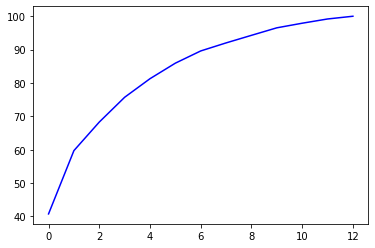

In [25]:
plt.plot(Var,color="blue");

Variance plot for PCA components obtained 


### Scree plot

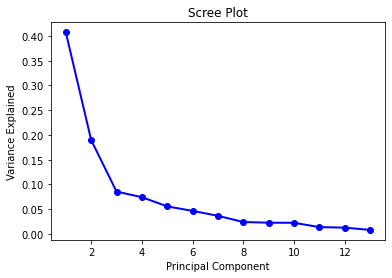

In [26]:
PC_values = np.arange(pcas.n_components_) + 1
plt.plot(PC_values, pcas.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [27]:
pca=z.iloc[:,:3]
pca

,PC1,PC2,PC3
0,1.965754,-0.497453,-0.233561
1,1.478743,-0.488921,-0.184450
2,1.911227,-0.322592,-0.105952
3,2.106077,-0.520098,-0.532945
4,1.853606,-0.019308,0.115458
...,...,...,...
173,1.486692,0.888320,-0.243248
174,1.435216,0.682077,-0.198380
175,1.406310,0.738718,-0.431830
176,1.411621,0.670539,-0.309485


In [28]:
var[:3].sum()  # thiis is the percentage of importance of 3 pca's

0.6828150695968221

# Heirarchical clustering

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [30]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [31]:
hc.fit_predict(z.iloc[:,:3])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 0, 2, 0,
       0, 2, 2, 0, 1, 0, 2, 4, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 4, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [32]:
from sklearn.metrics import silhouette_score as sil

In [33]:
nc=[2,3,4,5,6,7,8,9,10]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(pca)
    sc_score.append(sil(pca,y))

###  silhouette score

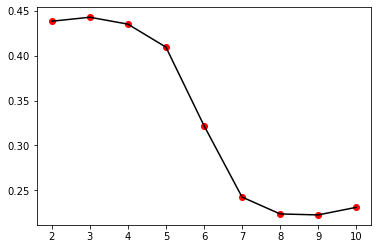

In [34]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [35]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [36]:
hc.fit_predict(pca)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [37]:
data["hc_id"]= hc.fit_predict(pca)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hc_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [38]:
data["hc_id"].value_counts()

2    71
1    54
0    53
Name: hc_id, dtype: int64

###  Projecting PC1, PC2, PC3 in 3D scatter plot

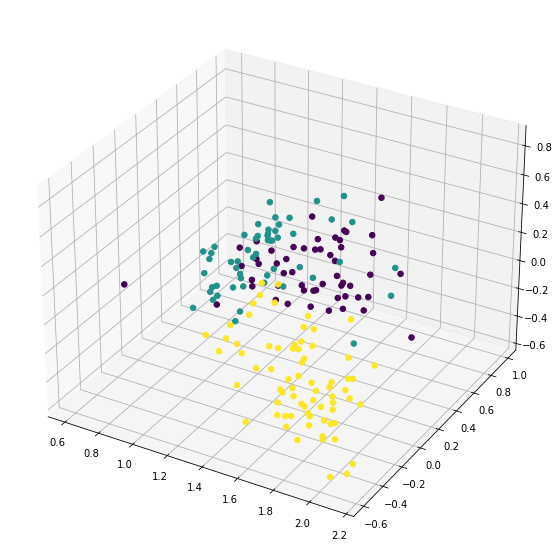

In [39]:
plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D( pca.iloc[:,0],pca.iloc[:,1],pca.iloc[:,2], c=hc.fit_predict(pca), s=30, alpha=1)

### Dendogram

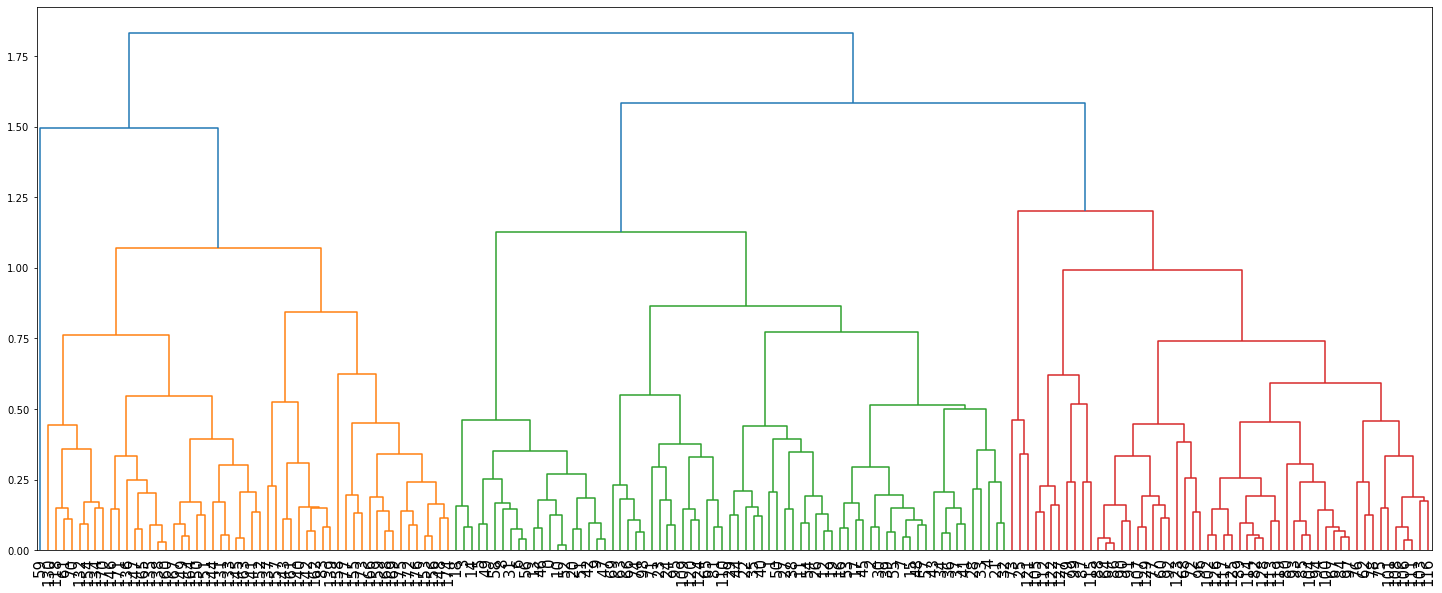

In [40]:
plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(pca, method='complete'),leaf_font_size=15)

# Kmeans 

In [41]:
from sklearn.cluster import KMeans

In [42]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(pca)

KMeans(n_clusters=5)

In [43]:
model_kmeans.labels_

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 0, 1, 1, 3, 1,
       1, 1, 3, 1, 3, 4, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 0, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 3, 0, 3, 1, 4, 3, 3, 1, 1, 1, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [44]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(n_clusters=i)
    km.fit(pca)
    iner.append(km.inertia_)

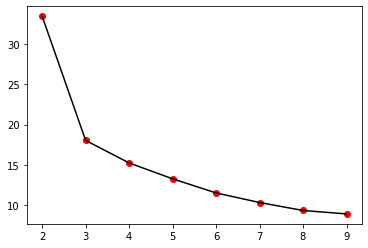

In [45]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

Elbow curve shows that optimal nummber of clusters is  3

In [46]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(pca)

KMeans(n_clusters=3)

In [47]:
model_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [48]:
data["k_labels"]= model_kmeans.labels_
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hc_id,k_labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,1


In [49]:
data["k_labels"].value_counts()

0    64
2    62
1    52
Name: k_labels, dtype: int64

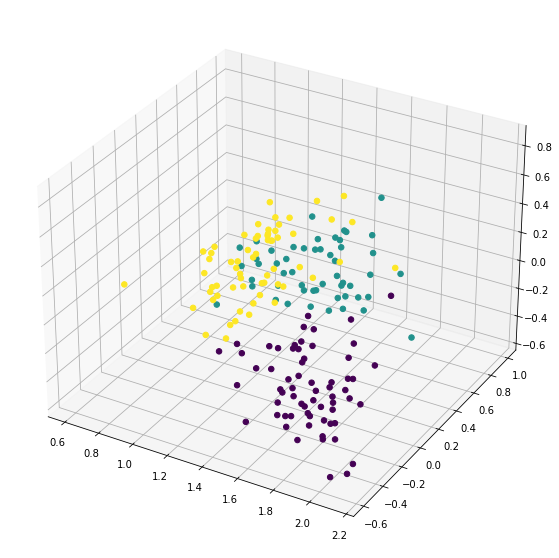

In [50]:
plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D( pca.iloc[:,0],pca.iloc[:,1],pca.iloc[:,2], c=model_kmeans.labels_, s=30, alpha=1)

# Now doing Hirarchical clustering and Kmeans clustering using original data

### - Hirarchical clustering

In [51]:
Hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [52]:
hc.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [53]:
nc=[2,3,4,5,6,7,8,9,10]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(X)
    sc_score.append(sil(X,y))

In [54]:
sc_score

[0.25652978717971897,
 0.27361994708059667,
 0.24582324970467156,
 0.23142821786994106,
 0.23254384858920182,
 0.22626162886161535,
 0.22102823706038713,
 0.21835997902731566,
 0.21346682288403157]

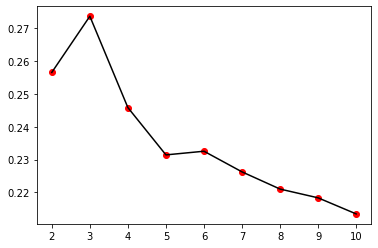

In [55]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

### - Kmeans clustering

In [56]:
kmeans= KMeans(n_clusters=3)

In [57]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [58]:
kmeans.fit(X).labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [59]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(n_clusters=i)
    km.fit(X)
    iner.append(km.inertia_)

In [60]:
iner

[64.53766702389431,
 48.95403581962662,
 44.8324277306194,
 42.47352464753945,
 40.21195673779505,
 38.393114797245,
 36.497755367743494,
 34.694523538927655]

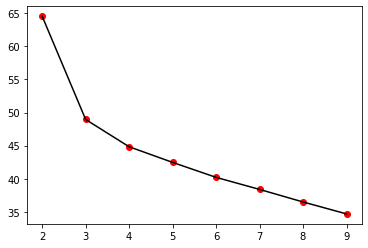

In [61]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

By elbow curve we can see that optimal no. of clusters is  3

# Conclusion

both heirarchial and k mean clustering for the PCA data and Original data has given a same optimal no. of clusters. i,e. = 3